# AutoML con H2O

### Docente: M.Sc. Richard Fernández

In [ ]:
! pip install h2o

     -------------------------------------- 177.6/177.6 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697897 sha256=3cb584f207ec5e8ab3aa02c8254e8c14659b33910005c583662ae9530bb13d9c
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\5d\cb\0e\dd8dc3921ae87b3657d7f1b83607100fd896107eef31d404c6
Successfully built h2o


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 hour 10 mins
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,"1 year, 1 month and 19 days"
H2O_cluster_name:,H2O_from_python_HP_f29gua
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.734 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### Comprensión del negocio

Objetivo del negocio: Incrementar el marketshare de "Perú Bank" en el mercado de depósitos a plazo.

Objetivo de ML: Predecir la probabilidad de que un cliente acepte el producto de depósito a plazo que ofrece "Perú Bank" mediante el canal de Call Center.

### Comprensión de los datos

In [ ]:
# Carga de datos en el cluster H2O
data_h2o = h2o.import_file(
                path   = "D:/Bases/Kaggle/Banco/bank_deposit.csv",
                header = 1,
                sep    = ",",
                destination_frame = "datos_h2o"
            )

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data_h2o['housing'] = data_h2o['housing'].asfactor()
data_h2o['loan'] = data_h2o['loan'].asfactor()
data_h2o['default'] = data_h2o['default'].asfactor()
data_h2o['target'] = data_h2o['target'].asfactor()

In [ ]:
data_h2o.head(5)

idcliente,duration,previous,housing,campaign,loan,default,target,muestra
1,261,0,1,1,0,0,0,1
2,50,0,1,1,0,0,0,1
3,1492,0,1,1,0,0,0,1
4,104,0,1,1,0,0,0,1
5,13,0,1,1,0,0,0,1


### Preparación de los datos

In [ ]:
train, valid, test = data_h2o.split_frame(ratios = [0.7, 0.15], seed = 1234)

In [ ]:
train.head(5)

idcliente,duration,previous,housing,campaign,loan,default,target,muestra
2,50,0,1,1,0,0,0,1
3,1492,0,1,1,0,0,0,1
5,13,0,1,1,0,0,0,1
6,172,0,1,1,1,0,0,1
7,583,0,1,1,0,0,0,1


In [ ]:
valid.head(5)

idcliente,duration,previous,housing,campaign,loan,default,target,muestra
1,261,0,1,1,0,0,0,1
18,98,0,1,1,0,0,0,1
22,167,0,1,1,0,0,0,0
23,562,0,1,1,0,0,0,1
32,1419,0,1,1,0,0,0,1


In [ ]:
test.head(5)

idcliente,duration,previous,housing,campaign,loan,default,target,muestra
4,104,0,1,1,0,0,0,1
10,203,0,1,1,0,0,0,1
15,175,0,0,1,1,0,0,0
19,186,0,1,2,0,0,0,0
20,128,0,1,2,0,0,0,1


In [ ]:
X_h2o = ['housing','loan','duration']
y_h2o = 'target'

### Modelado con AutoML

In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
automl_model = H2OAutoML(max_models=10,
                         seed=1)
automl_model.train(X_h2o,y_h2o,training_frame = train,leaderboard_frame = valid)

AutoML progress: |█
16:25:32.133: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
automl_model.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20240616_162532,0.8418,0.494433,0.831373,0.26807,0.403801,0.163056
StackedEnsemble_AllModels_1_AutoML_1_20240616_162532,0.841062,0.495668,0.830038,0.257062,0.404185,0.163365
GBM_2_AutoML_1_20240616_162532,0.840592,0.494448,0.828581,0.268096,0.403913,0.163146
GBM_5_AutoML_1_20240616_162532,0.840287,0.497528,0.829897,0.256773,0.404668,0.163756
GBM_1_AutoML_1_20240616_162532,0.840188,0.496563,0.829714,0.256312,0.404209,0.163385
GBM_4_AutoML_1_20240616_162532,0.839966,0.497166,0.82905,0.240735,0.404389,0.163531
GBM_3_AutoML_1_20240616_162532,0.839953,0.496302,0.82718,0.258247,0.404402,0.163541
GLM_1_AutoML_1_20240616_162532,0.833001,0.51784,0.825169,0.251427,0.410109,0.168189
DRF_1_AutoML_1_20240616_162532,0.821112,0.559285,0.800264,0.227015,0.431243,0.18597
XRT_1_AutoML_1_20240616_162532,0.821021,0.590319,0.815521,0.284384,0.447159,0.199951


In [ ]:
id_automl_model_best = automl_model.leaderboard[0,0]
id_automl_model_best

'StackedEnsemble_BestOfFamily_1_AutoML_1_20240616_162532'

In [ ]:
automl_model.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
automl_model_best = h2o.get_model(id_automl_model_best)

### Evaluación

In [ ]:
automl_model_best_predict = automl_model_best.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
automl_model_best_predict.head(5)

predict,p0,p1
0,0.899232,0.100768
0,0.764568,0.235432
0,0.768491,0.231509
0,0.760364,0.239636
0,0.88359,0.11641


In [ ]:
automl_model_best_performance = automl_model_best.model_performance(test_data = test)

In [ ]:
#Métricas de test
print(f"auc: {automl_model_best_performance.auc()}")
print(f"Gini: {automl_model_best_performance.gini()}")

auc: 0.8428940734093919
Gini: 0.6857881468187839


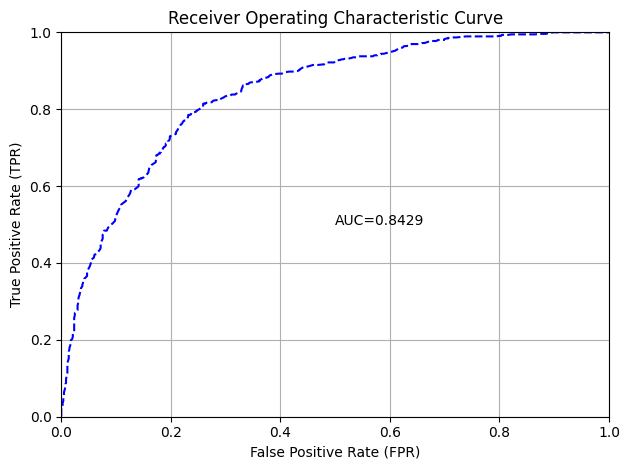

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0012391573729863693,
  0.0024783147459727386,
  0.0024783147459727386,
  0.0024783147459727386,
  0.0024783147459727386,
  0.0024783147459727386,
  0.0037174721189591076,
  0.0037174721189591076,
  0.0037174721189591076,
  0.004956629491945477,
  0.004956629491945477,
  0.006195786864931847,
  0.007434944237918215,
  0.007434944237918215,
  0.008674101610904586,
  0.008674101610904586,
  0.009913258983890954,
  0.009913258983890954,
  0.011152416356877323,
  0.011152416356877323,
  0.011152416356877323,
  0.011152416356877323,
  0.011152416356877323,
  0.011152416356877323,
  0.011152416356877323,
  0.011152416356877323,
  0.011152416356877323,
  0.012391573729863693,
  0.013630731102850062,
  0.013630731102850062,
  0.013630731102850062,
  0.013630731102850062,
  0.01486988847583643,
  0.01486988847583643,
  0.0161090458488228,
  0.01734820322180917,
  0.01734820322180917,
  0.01734820322180917,
  0.01734

In [ ]:
#Curva ROC
automl_model_best_performance.plot(type='roc')

### Implementación

Se puede exportar el modelo más adecuado para ponerlo en un ambiente de producción. A partir de ello se puede generar un API para alimentar una aplicación web o móvil.

##### Guardar el Modelo

In [ ]:
model_path = h2o.save_model(model = automl_model_best, path="D:/Bases/Kaggle/Banco", force=True)

In [ ]:
print(model_path)

D:\Bases\Kaggle\Banco\StackedEnsemble_AllModels_1_AutoML_4_20231126_171733


##### Cargar el Modelo

In [ ]:
saved_model = h2o.load_model(model_path)